# Patrick Adams 1231065
# Assignment 3

In [84]:
#imports

import pandas as pd
import numpy as np
import matplotlib as plt

import seaborn as sb

from sklearn.model_selection import train_test_split



In [79]:
#creating and loading dataframe

BostonHousing = pd.read_csv("BostonHousing.csv")

In [6]:
BostonHousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Part 1: Preprocessing

In [10]:
#Checking for any missing values

BostonHousing.columns[BostonHousing.isnull().any()].tolist()

[]

In [58]:
#Visualizing multicollinearity using HeatMaps

#First, creating a correltion matrix
BostonHousing.corr().head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [69]:
#Using boolean values to show values that have a correlation value above 0.75

abs(BostonHousing.corr())>0.75

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
crim,True,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,True,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,True,False,True,False,False,False,False,False,False,False,False
chas,False,False,False,True,False,False,False,False,False,False,False,False,False
nox,False,False,True,False,True,False,False,True,False,False,False,False,False
rm,False,False,False,False,False,True,False,False,False,False,False,False,False
age,False,False,False,False,False,False,True,False,False,False,False,False,False
dis,False,False,False,False,True,False,False,True,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,True,False,False,False,False
ptratio,False,False,False,False,False,False,False,False,False,True,False,False,False


<AxesSubplot: >

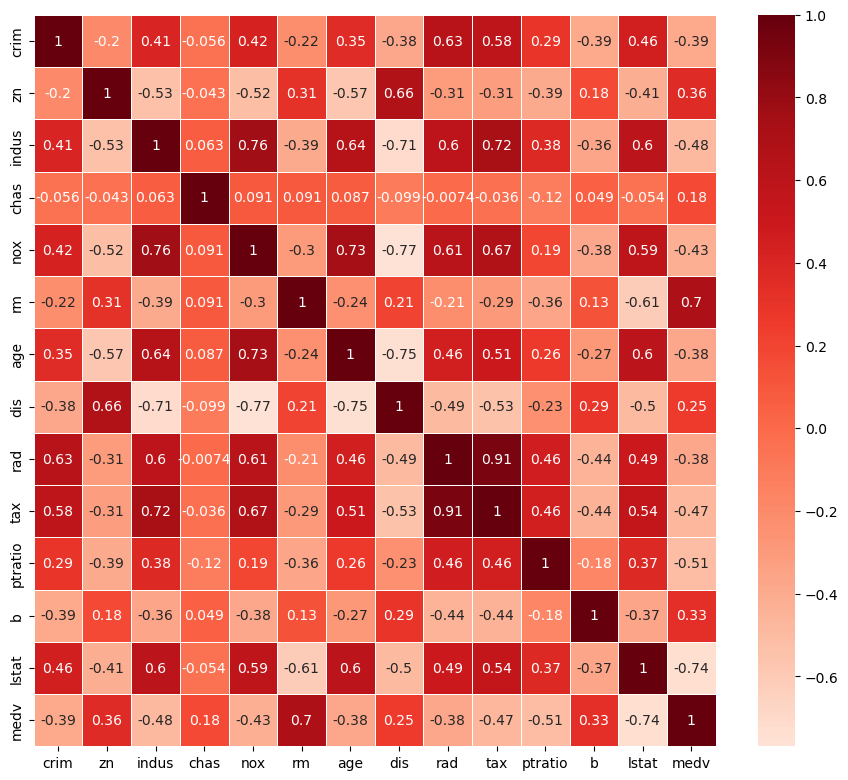

In [60]:
#Creating a heatmap to further visualize correlation

#setting size of figure
f, ax = plt.pyplot.subplots(figsize=(11,9.5))

sb.heatmap(BostonHousing.corr(),center=0,linewidths=0.5,cmap='Reds',annot=True)

In [80]:
#Removing 'tax' as it is highly correlated to 'rad' and is less correlated to the target

#also removing 'rm' because the correlation is 0.7 which is still fairly high
BostonHousing = BostonHousing.drop('tax',axis=1)

BostonHousing = BostonHousing.drop('rm',axis=1)


In [81]:
BostonHousing.head()

,crim,zn,indus,chas,nox,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,18.7,396.90,5.33,36.2


## Part 2: Build Model to get Baseline

In [88]:
#Splitting data into training and testing set

housing_features = BostonHousing.drop("medv", axis = 1)
housing_target = BostonHousing["medv"]

housing_training_data, housing_test_data, housing_training_target, housing_test_target = train_test_split(housing_features, housing_target, test_size=0.20,random_state=42)